# Preprocesamiento de texto

El <b>preprocesamiento de texto</b> es un paso esencial en tareas de NLP e implica limpiar y transformar datos de texto (datos no estructurados), con el objetivo de prepararlos para el análisis.

En este Notebook aprenderá a aplicar las tareas de preprocesamiento elementales, esto es análisis léxico y sintáctico:
- Limpieza de texto,
- Tokenización,
- Eliminación de palabras vacías (stop words),
- Normalización: Stemming y lematización e
- Identificación de multi-palabras.

**Referencias bibliográficas:**

- Deepanshi (2023). Text Preprocessing in NLP with Python Codes, Analytics Vidhya. Disponible en https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

## Dataset: correos electrónicos
- Dataset: Datos de spam de SMS para preprocesamiento de texto. Disponible en: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
#Comencemos importando la biblioteca pandas y leyendo los datos.
import pandas as pd

# Cargar el dataset, cada línea está compuesta por dos columnas:
# v1 contiene la etiqueta (ham o spam) y
# v2 contiene el texto sin formato.
# Además, algunas filas tienen celdas sin valor.
data = pd.read_csv("./spam.csv",encoding="ISO-8859-1",
                   header=None, skiprows=1,
                   names = ["target", "text", "v3", "v4", "v5"])

data.sample(5)


,target,text,v3,v4,v5
2649,ham,You might want to pull out more just in case a...,NaN,NaN,NaN
4275,ham,Can you please send me my aunty's number,NaN,NaN,NaN
2238,ham,Think you sent the text to the home phone. Tha...,NaN,NaN,NaN
4570,ham,\CHA QUITEAMUZING THATåÕSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE J...,NaN,NaN
4947,spam,"Hi this is Amy, we will be sending you a free ...",NaN,NaN,NaN


In [2]:
#Ampliación de ancho del display para ver mejor el texto de la columna de mensajes.
pd.set_option('display.max_colwidth', 300)

#Usar las dos primeras columnas y renombrarlas:
data= data [['target','text']]
data.sample(5, random_state=42)

,target,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens"
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones"
1044,spam,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p"
2484,ham,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
812,spam,Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16


El dataset tienen 5572 filas y 2 columnas. Puede comprobar la forma de los datos utilizando la función *data.shape*. 

También, comprobemos la distribución de la variable dependiente: categorías spam y ham.

In [3]:
print(data.shape) # Tamaño del dataset

#checking the count of the dependent variable
data['target'].value_counts()

(5572, 2)


target
ham     4825
spam     747
Name: count, dtype: int64

En este dataset etiquetado tenemos menos mensajes tipo de spam. Como veremos en el capítulo 3, cuando tenemos un **dataset desbalanceado** (más observaciones para una clase, que para otra), el rendimiento del clasificador puede jugar en contra de la clase menos favorecida. Por tanto, como parte de la preparación del dataset, más adelante, deberíamos elegir bien los métodos de clasificación o elegir algún método para tratamiento del dataset desbalanceado.

## 1.1 Limpieza de texto

Dependiendo de la naturaleza y calidad del texto a analizar, podemos aplicar diferentes técnicas como:

- Eliminación de URLs.
- Eliminación de etiquetas HTML.
- Eliminación de signos de puntuación o caracteres especiales (Removal of Punctuations).
- Eliminación de números (si es necesario).

Pero para asegurar una máxima eficiencia de las tareas de limpieza, vamos a convertir el texto en minúsculas (tarea que es parte de la **normalización de texto**).

Además, luego de *tokenizar a nivel de palabras*, podríamos aplicar otras técnicas de limpieza como: 

- Eliminación de palabras frecuentes (Removal of Frequent words).
- Eliminación de palabras raras (Removal of Rare words).
- Eliminación de emojis (Removal of Emojis).
- Eliminación de emoticones (Removal of Emoticons).
- Conversión de emoticones a palabras (Conversion of Emoticon to Words).
- Conversión de emojis a palabras (Conversion of Emoji to Words).
  Conversión de palabras de chat.


### 1.1.1 Cambiar el texto a minúsculas (Lowering the Text)

Este uno de los pasos de preprocesamiento de texto más comunes, donde el texto se transforma a minúsculas. Pero hay que evaluar si este paso se debe realizar para una aplicación particular, ya que en algunos casos, las minúsculas pueden provocar la pérdida de información, como en el reconocimiento de entidades. Por ejemplo, si en algún proyecto tratamos con las emociones de una persona, entonces las palabras escritas en mayúsculas pueden ser un signo de frustración o emoción.


In [4]:
data['clean_text']= data['text'].apply(lambda x: x.lower())
data.sample(5)

,target,text,clean_text
5348,ham,Do I? I thought I put it back in the box,do i? i thought i put it back in the box
507,ham,You should know now. So how's anthony. Are you bringing money. I've school fees to pay and rent and stuff like that. Thats why i need your help. A friend in need....|,you should know now. so how's anthony. are you bringing money. i've school fees to pay and rent and stuff like that. thats why i need your help. a friend in need....|
4806,spam,PRIVATE! Your 2004 Account Statement for 078498****7 shows 786 unredeemed Bonus Points. To claim call 08719180219 Identifier Code: 45239 Expires 06.05.05,private! your 2004 account statement for 078498****7 shows 786 unredeemed bonus points. to claim call 08719180219 identifier code: 45239 expires 06.05.05
655,ham,Tell them the drug dealer's getting impatient,tell them the drug dealer's getting impatient
2320,ham,This pain couldn't have come at a worse time.,this pain couldn't have come at a worse time.


Salida: Todo el texto de la columna text se convierte a minúsculas y se almacena en la columna *clean_text*.

### 1.1.2 Eliminación de URLs

El siguiente paso del preprocesamiento es eliminar todas las URL presentes en los datos. Por ejemplo, si estamos realizando un análisis de Twitter o de mensajes de correo, es muy probable que el mensaje contenga alguna URL. 

Podemos usar el siguiente fragmento de código para hacerlo.

In [5]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

Tomemos un mensaje con una dirección web para constatar:

In [6]:
#Presentar el primer texto que incluye una dirección web:
data[data['text'].str.contains('http', case=False, na=False)].iloc[0].text # fila 15

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap.xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [7]:
#Aplicar función para quitar URLs:
data['clean_text']= data['clean_text'].apply(lambda x:remove_urls(x))

data.iloc[15]

target                                                                                                                                                        spam
text          XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap.xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
clean_text                                                     xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>> 
Name: 15, dtype: object

Como observamos, hemos editado la columna de datos *clean_text* en la cual almacenamos el texto limpio.

### 1.1.3 Eliminación de etiquetas HTML

Otra técnica de preprocesamiento común que será útil es la eliminación de etiquetas HTML. Esto es especialmente útil si extraemos los datos de diferentes sitios web. Podríamos terminar teniendo cadenas HTML como parte de nuestro texto.

Para comprobar si hay etiquetas HTML vamos a hacer una simple búsqueda para determinar la posible presencia de código HTML.

In [8]:
#Presentar el primer texto que incluye alguna etiqueta:

data[data['text'].str.contains('<', case=False, na=False)] #iloc[1] # fila 15

,target,text,clean_text
689,spam,<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.,<forwarded from 448712404000>please call 08712404000 immediately as there is an urgent message waiting for you.
2266,spam,<Forwarded from 88877>FREE entry into our å£250 weekly comp just send the word ENTER to 88877 NOW. 18 T&C www.textcomp.com,<forwarded from 88877>free entry into our å£250 weekly comp just send the word enter to 88877 now. 18 t&c
2296,spam,<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches,<forwarded from 21870000>hi - this is your mailbox messaging sms alert. you have 4 messages. you have 21 matches. please call back on 09056242159 to retrieve your messages and matches
2619,spam,<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min,<forwarded from 21870000>hi - this is your mailbox messaging sms alert. you have 40 matches. please call back on 09056242159 to retrieve your messages and matches cc100p/min
4110,spam,URGENT! Your Mobile number has been awarded a <UKP>2000 prize GUARANTEED. Call 09061790125 from landline. Claim 3030. Valid 12hrs only 150ppm,urgent! your mobile number has been awarded a <ukp>2000 prize guaranteed. call 09061790125 from landline. claim 3030. valid 12hrs only 150ppm
5228,spam,PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04,private! your 2003 account statement for <fone no> shows 800 un-redeemed s. i. m. points. call 08715203656 identifier code: 42049 expires 26/10/04


Como observamos, al parecer no hay etiquetas HTML en el texto. Con fines de reuso, a continuación, se proporciona el código que se pueda usar para eliminar las etiquetas HTML usando expresiones regulares.

In [9]:
html_pattern = re.compile('<.*?>')

def remove_html(text):   
    return html_pattern.sub(r'', text)

# texto de ejemplo:
text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

print(remove_html(text)) # como quedaría el texto limpio


 H2O
 AutoML
 Driverless AI



También podemos utilizar el paquete *BeautifulSoup* para obtener el texto del documento HTML de una manera más elegante.

In [10]:
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>
"""

print(remove_html(text))


 H2O
 AutoML
 Driverless AI




### 1.1.4 Eliminar signos de puntuación

En este paso, se eliminan todas las puntuaciones del texto. La biblioteca *string* de Python contiene una lista predefinida de signos de puntuación como: !"#$%&'()*+,-./:;?@[\]^_`{|}~.

Esta técnica de estandarización de texto nos ayudará a tratar "hermoso!!!" y "hermoso" de la misma manera.

También podemos personalizar los signos a remover, para no quitar todos los signos que están en *string* Por ejemplo, el punto "." puede ser importante conservar para luego dividir (tokenizar) el texto en sentencias y realizar otro tipo de análisis. Finalmente, podemos agregar o eliminar más signos de puntuación según nuestras necesidades.

Por ahora, vamos a eliminar todos los signos que están en *string.punctuation*.

In [11]:
#library that contains punctuation
import string
print(string.punctuation)

#defining the function to remove punctuation
def remove_punctuation(text):
    #Verificar letra a letra y juntar todo el texto
    punctuationfree = "".join([i for i in text if i not in string.punctuation]) 
    return punctuationfree
    
#storing the puntuation free text
data['clean_text']= data['clean_text'].apply(lambda x:remove_punctuation(x))
data.head(3)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s


### 1.1.5 Eliminar números

desde aquí source: https://www.kaggle.com/code/deffro/text-pre-processing-techniques


Ejemplo: ¿Cuál es el mejor banco de energía para iPhone 7 en India? -> ¿Cuál es el mejor banco de energía para iPhone en India?

In [12]:
"a".isnumeric()

False

In [13]:
def remove_numbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#aplicar remove_numbers
data['clean_text']= data['clean_text'].apply(lambda x:remove_numbers(x))
data.head(3)

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs


Podemos ver en el resultado anterior que todas los signos se eliminan y el resultado se almacena en la columna *clean_text*.

### 1.1.6 Reemplazar contracciones

Esta técnica reemplaza las contracciones en inglés, por sus equivalentes.

Ejemplo: it's -> it is, don't -> do not.

Podemos usar la librería **contractions** para realizar un proceso más directo, o podemos crear una lista personalizada de equivalencias para mapear todas las contracciones.

In [14]:
# Opción 1. Usar la librería contractions: https://github.com/kootenpv/contractions
# pip install contractions
#import contractions
#contractions.fix("you're happy now")
# "you are happy now"

# Opción 2. Crear una lista personalizada de contracciones:
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), 
                         (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), 
                         (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), 
                         (r'wont', 'will not'), (r'id', 'i would')]

patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
print(patterns)

def replace_contractions(text):
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text) #specifies strings or a set of strings or patterns that match it
    return text

data['clean_text']= data['clean_text'].apply(lambda x: replace_contractions(x))
data[['text','clean_text']]

[(re.compile("won\\'t"), 'will not'), (re.compile("can\\'t"), 'cannot'), (re.compile("i\\'m"), 'i am'), (re.compile("ain\\'t"), 'is not'), (re.compile("(\\w+)\\'ll"), '\\g<1> will'), (re.compile("(\\w+)n\\'t"), '\\g<1> not'), (re.compile("(\\w+)\\'ve"), '\\g<1> have'), (re.compile("(\\w+)\\'s"), '\\g<1> is'), (re.compile("(\\w+)\\'re"), '\\g<1> are'), (re.compile("(\\w+)\\'d"), '\\g<1> would'), (re.compile('&'), 'and'), (re.compile('dammit'), 'damn it'), (re.compile('dont'), 'do not'), (re.compile('wont'), 'will not'), (re.compile('id'), 'i would')]


,text,clean_text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",this is the nd time we have tried contact u u have won the å£ pound prize claim is easy call now only p per minute btnationalrate
5568,Will Ì_ b going to esplanade fr home?,will ì b going to esplanade fr home
5569,"Pity, * was in mood for that. So...any other suggestions?",pity was in mood for that soany other suggestions
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,the guy di would some bitching but i acted like i would be interested in buying something else next week and he gave it to us for free


In [15]:
data.sample(10).head()

,target,text,clean_text
3217,ham,Don know:)this week i'm going to tirunelvai da.,don knowthis week im going to tirunelvai da
4468,ham,"Nothing, smsing u n xy lor. Sorry lor da guys neva c u in person but they sort of know u lor. So u wan 2 meet them xy ask me 2 bring u along 4 our next meeting.",nothing smsing u n xy lor sorry lor da guys neva c u in person but they sort of know u lor so u wan meet them xy ask me bring u along our next meeting
2200,ham,Haha... can... But i'm having dinner with my cousin...,haha can but im having dinner with my cousin
3477,ham,I can ask around but there's not a lot in terms of mids up here,i can ask around but theres not a lot in terms of mi woulds up here
5168,ham,"IÛ÷ve got some salt, you can rub it in my open wounds if you like!",iû÷ve got some salt you can rub it in my open wounds if you like


Salida: Todo el texto de la columna clean_text queda sin contracciones.

## 1.2 Tokenización

En este paso, el texto se divide el texto en unidades más pequeñas. Podemos utilizar la tokenización de oraciones (*sentences*) o la tokenización de palabras según el planteamiento de nuestro problema.

Lo más habitual para continuar con la limpieza de texto es **tokenizar a nivel de palabras**. Antes de usar *word_tokenize* descargamos **punkt** método que refers utiliza signos de puntuación como los "." o espacios para tokenizar.

In [19]:
import nltk
nltk.download('punkt') # Paquete que contiene los tokenizadores
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [20]:
from nltk.tokenize import word_tokenize

# usar word_tokenize para tokenizar texto:
data['tokenized_text']= data['clean_text'].apply(lambda x: word_tokenize(x))
data.sample(2)

,target,text,clean_text,tokenized_text
4464,ham,"\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I WANNATELL U DETAILS LATER WENWECAN CHAT PROPERLY X\""""",cheers for callin babesozi culdnt talkbut i wannatell u details later wenwecan chat properly x,"[cheers, for, callin, babesozi, culdnt, talkbut, i, wannatell, u, details, later, wenwecan, chat, properly, x]"
2558,ham,"Some friends want me to drive em someplace, probably take a while",some friends want me to drive em someplace probably take a while,"[some, friends, want, me, to, drive, em, someplace, probably, take, a, while]"


## 1.3 Eliminación de palabras vacías (stop words)

Las palabras vacías son las palabras de uso común y se eliminan del texto porque no agregan ningún valor al análisis. Estas palabras tienen menos o ningún significado. Esta tarea se considera dentro de la normalización de texto, aunque aquí la vamos a tratar antes.

La biblioteca NLTK provee de una lista de palabras que se consideran stop words para el idioma inglés. Algunos palabras son: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your']

Aunque dependiendo del proyecto, podemos personalizar la lista, agregando o quitando stop words. 

In [21]:

#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
print("Lista de stop words:\n")
print(stopwords) # Imprimir la lista

stopwords = stopwords + ['hi', 'ok', 'u', 'well', 'oh'] # Además, podemos agregar más palabras vacías a la lista.

#defining the function to remove stopwords from tokenized te
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
data['norm_text']= data['tokenized_text'].apply(lambda x:remove_stopwords(x))
data.head(5)

Lista de stop words:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

,target,text,clean_text,tokenized_text,norm_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,"[free, entry, in, a, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive, entry, questionstd, txt, ratetcs, apply, overs]","[free, entry, wkly, comp, win, fa, cup, final, tkts, st, may, text, fa, receive, entry, questionstd, txt, ratetcs, apply, overs]"
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,"[nah, i, do, not, think, he, goes, to, usf, he, lives, around, here, though]","[nah, think, goes, usf, lives, around, though]"


Salida: Las palabras vacías que están presentes en la biblioteca nltk se eliminan del texto tokenizado y el resto se almacena en la columna *norm_text*.

## 1.4 Normalización

La normalización del texto se refiere al proceso de preparación de texto para su análisis o procesamiento posterior. Involucra la conversión de texto de mayúsculas o minúsculas o viceversa, eliminación de tildes y acentos, y demás símbolos no relevantes. Como normalización también se consideran ciertas tareas de limpieza de texto, como la eliminación de caracteres no alfanuméricos (como signos de puntuación y eliminación de caracteres no alfanuméricos), lo cual ya lo llevó a cabo previamente). También, a la eliminación de stop words se la considera como una tarea de normalización.

El **objetivo** de la normalización es convertir el texto en una forma estándar, que sea fácil de procesar y comparar. Esto ayuda a mejorar la calidad de los resultados de búsqueda, la clasificación de texto y otros algoritmos de NLP. La normalización del texto es un paso crucial en la preprocesamiento de texto.

Otras tareas comunes de normalización incluyen al stemming y lematización.

### 1.4.1 Stemming

Al stemming, también se conoce como el paso de estandarización del texto en el que las palabras se derivan o se reducen a su forma raíz/base. Por ejemplo, palabras como "programador", "programación", "programa" derivan de "programa".

Pero la desventaja del stemming es que deriva las palabras de tal manera que su forma raíz pierde el significado o no se reduce a una palabra adecuada. 

**Principales algoritmos**:

- Algoritmo de Porter: Es uno de los algoritmos de stemming más utilizados y fue desarrollado por Martin Porter en 1980. Este algoritmo aplica una serie de reglas para cortar los sufijos y obtener la raíz de la palabra.
- Algoritmo de Snowball: Es una versión mejorada del algoritmo de Porter y soporta múltiples idiomas.

In [22]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

# Probando Snowball para español:
es_stemmer = SnowballStemmer('spanish') # for english
stem_word1 = es_stemmer.stem("programación") # Para una palabra en español
stem_word2 = es_stemmer.stem("programar") # Para una palabra en español

print("Stemming en español: ", stem_word1, ', ', stem_word2)

#Utilizando el algoritmo de Porter para inglés:
eng_stemmer = PorterStemmer() # for english
def stemming_eng(text):
    stem_text = [eng_stemmer.stem(word) for word in text]
    return stem_text

data['stemmed_text'] = data['norm_text'].apply(lambda x: stemming_eng(x))
data.sample(2, random_state=42)


Stemming en español:  program ,  program


,target,text,clean_text,tokenized_text,norm_text,stemmed_text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens",funny fact nobody teaches volcanoes erupt tsunamis arise hurricanes sway aroundn no teaches hw choose a wife natural disasters just happens,"[funny, fact, nobody, teaches, volcanoes, erupt, tsunamis, arise, hurricanes, sway, aroundn, no, teaches, hw, choose, a, wife, natural, disasters, just, happens]","[funny, fact, nobody, teaches, volcanoes, erupt, tsunamis, arise, hurricanes, sway, aroundn, teaches, hw, choose, wife, natural, disasters, happens]","[funni, fact, nobodi, teach, volcano, erupt, tsunami, aris, hurrican, sway, aroundn, teach, hw, choos, wife, natur, disast, happen]"
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones",i sent my scores to sophas and i had to do secondary application for a few schools i think if you are thinking of applying do a research on cost also contact joke ogunrinde her school is one me the less expensive ones,"[i, sent, my, scores, to, sophas, and, i, had, to, do, secondary, application, for, a, few, schools, i, think, if, you, are, thinking, of, applying, do, a, research, on, cost, also, contact, joke, ogunrinde, her, school, is, one, me, the, less, expensive, ones]","[sent, scores, sophas, secondary, application, schools, think, thinking, applying, research, cost, also, contact, joke, ogunrinde, school, one, less, expensive, ones]","[sent, score, sopha, secondari, applic, school, think, think, appli, research, cost, also, contact, joke, ogunrind, school, one, less, expens, one]"


Salida: En la tabla, podemos ver cómo algunas palabras se derivan de su base.

funny-> funni

teaches-> teach

volcanoes-> volvano

Ahora veamos en qué se diferencia la lematización de la derivación.


### 1.4.2 Lematización

Deriva la palabra pero se asegura de que no pierda su significado. La lematización tiene un diccionario predefinido que almacena el contexto de las palabras y verifica la palabra en el diccionario mientras la acorta.

En comparación con stemming, la lematización: Utiliza vocabulario y análisis morfológico, mientras que stemming utiliza reglas heurísticas simples. Devuelve palabras con el formato en que aparecen en el diccionario, mientras que stemming puede devolver palabras no válidas.

Dependiendo del lenguaje del texto necesitaremos diferente lematizador.

A continuación, veremos un ejemplo para procesar **texto en español**, usando la librería spacy_stanza.

In [ ]:
stanza.download("es")

In [ ]:
import stanza
import spacy_stanza

# Download the stanza model if necessary
stanza.download("es")

# Initialize the pipeline
nlp = spacy_stanza.load_pipeline("es", processors='tokenize,pos,lemma', tokenize_pretokenized = True, verbose=False, use_gpu=False)

c:\Users\usuario\.conda\envs\env_llm\Lib\site-packages\stanza\models\pos\trainer.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
c:\Users\usuario\.conda\envs\env_llm\Lib

In [26]:
text = "El programador creó un programa corto y en poco tiempo."

doc = nlp(text)

for token in doc:
    print(token.text, '->', token.lemma_)


El -> el
programador -> programador
creó -> crear
un -> uno
programa -> programa
corto -> corto
y -> y
en -> en
poco -> poco
tiempo. -> tiempo.


Ahora usaremos *WordNetLemmatizer* de NLTK para lematizar el texto del dataset de mensajes de correo.

In [27]:
from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
    
data['lemmatized_text']=data['norm_text'].apply(lambda x:lemmatizer(x))
data.iloc[[0, 17]][['text', 'clean_text', 'tokenized_text', 'norm_text', 'stemmed_text', 'lemmatized_text']]

,text,clean_text,tokenized_text,norm_text,stemmed_text,lemmatized_text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
17,Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.,eh u remember how spell his name yes i di would he v naughty make until i v wet,"[eh, u, remember, how, spell, his, name, yes, i, di, would, he, v, naughty, make, until, i, v, wet]","[eh, remember, spell, name, yes, di, would, v, naughty, make, v, wet]","[eh, rememb, spell, name, ye, di, would, v, naughti, make, v, wet]","[eh, remember, spell, name, yes, di, would, v, naughty, make, v, wet]"


Además de NLTK, podemos usar **spacy**. SpaCy tiene como objetivo facilitar la puesta en producción de las aplicaciones de software en el ámbito del lenguaje natural. A continuación, se explica con una frase específica.
Como vemos más abajo, para lematizar, usamos el modelo *en_core_web_sm*. 

**en_core_web_sm** es una versión compacta (small) del modelo de lenguaje spaCy *en_core_web*. Puede ser utilizado para:

- El reconocimiento de entidades: personas, lugares, organizaciones, fechas, etc.
- El reconocimiento de tokens: divide el texto en palabras y símbolos.
- Identificar dependencias gramaticales como sujeto-objeto, etc.
- Feature extraction: extrae características del texto como parte de speech, nombre de entidades, etc.
  
Estas características pueden ser útiles para tareas de análisis de texto como clasificación de texto.

El pipeline le dice a spaCy que use el lenguaje "en" y el pipeline consta de ["tok2vec", "tagger", "parser", "ner", "attribute_ruler", "lemmatizer"]

In [28]:
import spacy

nlp = spacy.load("en_core_web_sm") # Para español, podemos usar es_core_news_sm
print(nlp.pipe_names) # componentes del pipeline por defecto (o usar nlp.pipeline)

docs = ["its better running Python programmers often tend like programming in python because it's like english.", "We call people who program in python pythonistas."] # frase a analizar

doc = nlp(docs[0]) # Procesar el primer documento.
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.lemma_, token.dep_)


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

Ahora probemos con el modelo **es_core_news_md** para procesar texto en **español**. Antes, sino es la primera vez que lo vamos a usar, debemos descargarlo.

In [23]:
#!python -m spacy download es_core_news_md # para descargarlo
import es_core_news_md

nlp_es = spacy.load("es_core_news_md")
frase = """El programador creó un programa corto y en poco tiempo."""
doc = nlp_es(frase)
for w in doc:
    print(w, '->', w.lemma_)

El -> el
programador -> programador
creó -> crear
un -> uno
programa -> programa
corto -> corto
y -> y
en -> en
poco -> poco
tiempo -> tiempo
. -> .


Una vez realizados los pasos fundamentales del procesamiento de texto, vamos a resumir, mediante gráficos los resultados de las diferentes tareas de preprocesamiento.

## 2. Visualización

### 2.1 Frecuencia de palabras

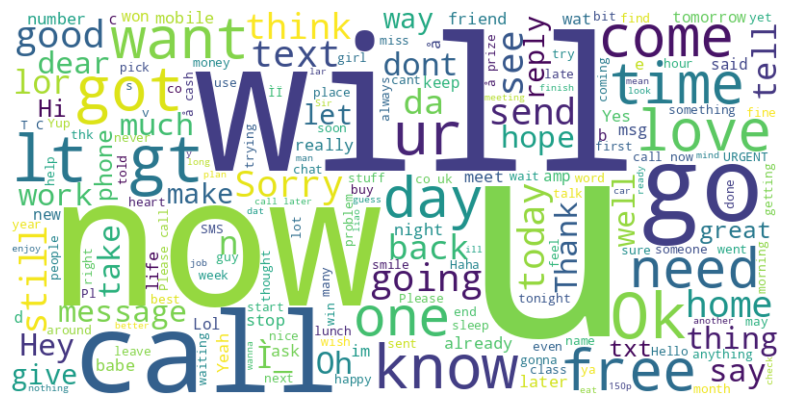

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualizar nube de palabras del texto original:
def viz_wordcloud(text):
    # Crear el objeto WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Mostrar la nube de palabras utilizando matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

stream = ' '.join(data.text.to_list()) # juntar todos los textos en un solo stream

viz_wordcloud(stream)

Como observamos en el gráfico anterior, si consideramos el texto original (esto es sin preprocesar) se destacan tokens poco informativos, como "u", "will", etc.

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'lar joking wif oni']


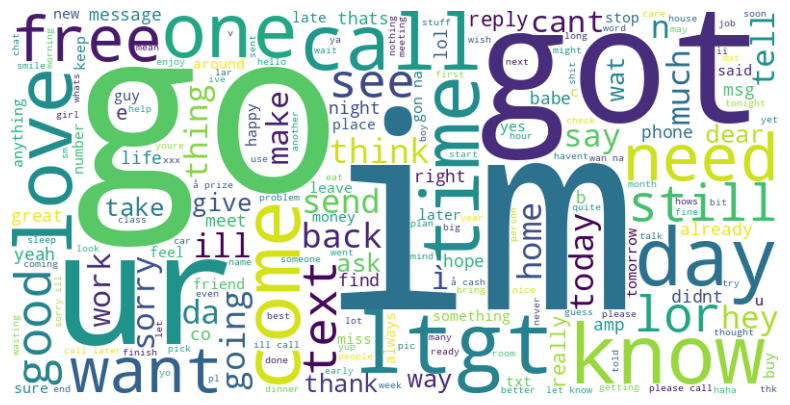

In [25]:
# Ahora visualicemos con el texto limpio y lematizado.

sentences = [' '.join(w) for w in data['lemmatized_text'].to_list()] # unir todos los tokens de un mensaje en un solo string
print(sentences[:2])

stream = ' '.join(sentences) # juntar todos los textos en un solo stream

viz_wordcloud(stream)


En la nube anterior, observamos que aún hay tokens que depurar (eliminar) y quizá hacer tratamiento de siglas.

Para tener una idea más exacta de las palabras más populares -o menos frecuentes- vamos a crear una lista de frecuencia de palabras.

In [26]:
from collections import Counter
wordList = data.lemmatized_text.to_list() # trabajar con el texto lematizado.

words = [w for s in wordList for w in s]
words # juntar todas las palabras de todos los mensajes en una sola lista

freq = Counter(words)

# Imprimir las palabras más comunes
print(freq.most_common()[:50])
most_common = pd.DataFrame(freq.most_common()[:25], columns=['word', 'count'])
most_common

[('call', 602), ('im', 464), ('get', 401), ('ur', 384), ('go', 308), ('free', 278), ('ltgt', 276), ('å£', 274), ('know', 267), ('day', 255), ('got', 251), ('come', 247), ('like', 245), ('ill', 237), ('good', 235), ('time', 233), ('text', 215), ('want', 213), ('love', 203), ('send', 190), ('need', 182), ('one', 180), ('going', 171), ('today', 169), ('r', 165), ('txt', 163), ('home', 162), ('lor', 160), ('see', 157), ('sorry', 156), ('stop', 156), ('still', 153), ('back', 152), ('mobile', 151), ('think', 146), ('reply', 146), ('n', 144), ('take', 142), ('tell', 142), ('phone', 140), ('new', 136), ('week', 134), ('later', 134), ('da', 133), ('please', 130), ('make', 124), ('cant', 123), ('say', 118), ('night', 118), ('ì', 117)]


,word,count
0,call,602
1,im,464
2,get,401
3,ur,384
4,go,308
5,free,278
6,ltgt,276
7,å£,274
8,know,267
9,day,255


<Axes: xlabel='word'>

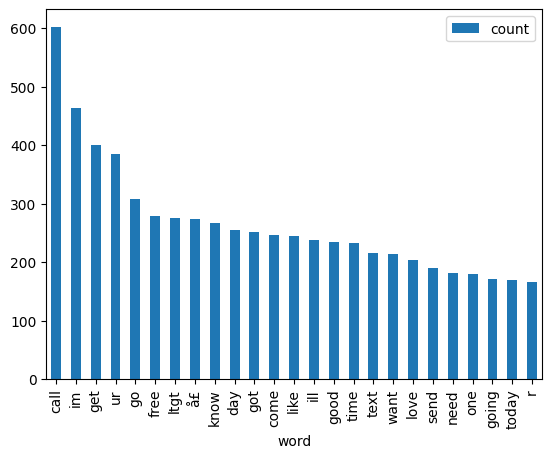

In [27]:
#Graficar:

most_common.plot.bar(x='word', y='count', rot=90)

## 1.5 Identificación de multi-palabras

Los términos que están conformados por más de una palabra se denominan *multi-palabra*.

Las **colocaciones** son términos multi-palabra, es decir, secuencias de palabras que, en conjunto, tienen un significado que difiere significativamente del significado de cada palabra individual (e.g. New York tiene un significado distinto del que se puede derivar de New y de York).

Para calcula los mejores bigramas y trigramas de un conjunto de textos podemos usar **collocations** de NLTK.


In [28]:
from nltk.collocations import *
import re


A partir del comando help(nltk.collocations.BigramAssocMeasures) podemos explorar la clase *BigramAssocMeasures* del módulo *nltk.metrics.association* y ver las definiciones de las métricas de *Likelihood Ratio* (likelihood_ratio) y de *Pointwise Mutual Information* (pmi) las cuales pueden ser usadas para identificar las colicaciones.


In [29]:
help(nltk.collocations.BigramAssocMeasures)

Help on class BigramAssocMeasures in module nltk.metrics.association:

class BigramAssocMeasures(NgramAssocMeasures)
 |  A collection of bigram association measures. Each association measure
 |  is provided as a function with three arguments::
 |  
 |      bigram_score_fn(n_ii, (n_ix, n_xi), n_xx)
 |  
 |  The arguments constitute the marginals of a contingency table, counting
 |  the occurrences of particular events in a corpus. The letter i in the
 |  suffix refers to the appearance of the word in question, while x indicates
 |  the appearance of any word. Thus, for example:
 |  
 |  - n_ii counts ``(w1, w2)``, i.e. the bigram being scored
 |  - n_ix counts ``(w1, *)``
 |  - n_xi counts ``(*, w2)``
 |  - n_xx counts ``(*, *)``, i.e. any bigram
 |  
 |  This may be shown with respect to a contingency table::
 |  
 |              w1    ~w1
 |           ------ ------
 |       w2 | n_ii | n_oi | = n_xi
 |           ------ ------
 |      ~w2 | n_io | n_oo |
 |           ------ ------
 |  

Primer paso: Obtener los tokens del texto de las opiniones y etiquetarlos por su PoS.

In [30]:
data['lemmatized_text']

0                                   [go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]
1                                                                                                               [lar, joking, wif, oni]
2       [free, entry, wkly, comp, win, fa, cup, final, tkts, st, may, text, fa, receive, entry, questionstd, txt, ratetcs, apply, over]
3                                                                                               [dun, say, early, hor, c, already, say]
4                                                                                           [nah, think, go, usf, life, around, though]
                                                                     ...                                                               
5567                                    [nd, time, tried, contact, å£, pound, prize, claim, easy, call, p, per, minute, btnationalrate]
5568                                            

In [31]:

#Crear texto en minúscula que recoja todas las opiniones

sentences = [' '.join(w) for w in data['lemmatized_text'].to_list()] # unir todos los tokens de un mensaje en un solo string
print(sentences[:2])

stream = '. '.join(sentences) # juntar todos los textos en un solo stream
print(stream[:200])


['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'lar joking wif oni']
go jurong point crazy available bugis n great world la e buffet cine got amore wat. lar joking wif oni. free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs 


In [32]:
# Generar una sola lista de todos los tokens
opinion_tokens = [w for w in word_tokenize(stream) if re.match("^[a-zA-Z]+.*", w) ] 
opinion_tokens[:20]


['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'lar',
 'joking',
 'wif',
 'oni']

In [33]:
#Cargamos las métricas para el cálculo de bigramas y trigramas:

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

### Cálculo de ngramas con PMI:
### =========================

#Encontrar los mejores candidatos a bigramas y trigramas de los tokens de los revisió, según PMI
length = 100
opinion_bigramcandidates_pmi = BigramCollocationFinder.from_words(opinion_tokens).nbest(bigram_measures.pmi,length)
opinion_trigramcandidates_pmi = TrigramCollocationFinder.from_words(opinion_tokens).nbest(trigram_measures.pmi,length)

#Integramos los bigramas y trigramas:
opinion_ngram_candidates_pmi = opinion_bigramcandidates_pmi + opinion_trigramcandidates_pmi

print("BEST BIGRAMS AND TRIGRAMS PMI", opinion_ngram_candidates_pmi)


BEST BIGRAMS AND TRIGRAMS PMI [('aaniye', 'pudunga'), ('ab', 'sara'), ('abdomen', 'gynae'), ('aberdeen', 'united'), ('accidant', 'tookplace'), ('accounting', 'delayed'), ('achieve', 'korli'), ('acknowledgement', 'astoundingly'), ('adding', 'zero'), ('addressull', 'alrightokay'), ('adi', 'entey'), ('adjustable', 'cooperative'), ('admiti', 'madthen'), ('adsense', 'approved'), ('affectionsamp', 'tradition'), ('afghanistan', 'stable'), ('african', 'soil'), ('agency', 'renting'), ('aging', 'product'), ('agocusoon', 'honi'), ('ahwhat', 'machiany'), ('albi', 'mufti'), ('albumquite', 'gdthe'), ('aldrine', 'rakhesh'), ('alertfrom', 'jeri'), ('aletter', 'thatmum'), ('ali', 'halla'), ('allahmeet', 'sometimerakheshvisitor'), ('alle', 'moneeppolum'), ('allo', 'braved'), ('ami', 'parchi'), ('amplikater', 'fidalfication'), ('andre', 'virgil'), ('angel', 'snowball'), ('animation', 'badass'), ('announced', 'blog'), ('anonymous', 'masked'), ('anythingtomorrow', 'myparents'), ('aphexåõs', 'abel'), ('apol

In [34]:

### Cálculo de ngramas con Likelihood Ratio:
### =========================

#Encontramos los mejores candidatos a bigramas y trigramas de los tokens de cada opinión, según Likehood Ratio
opinion_bigramcandidates_lr = BigramCollocationFinder.from_words(opinion_tokens).nbest(bigram_measures.likelihood_ratio,length)
opinion_trigramcandidates_lr = TrigramCollocationFinder.from_words(opinion_tokens).nbest(trigram_measures.likelihood_ratio,length)

#Integramos los bigramas y trigramas:

opinion_ngram_candidates_lr = opinion_bigramcandidates_lr + opinion_trigramcandidates_lr

print("BEST BIGRAMS AND TRIGRAMS LIKEHOOD RATIO", opinion_ngram_candidates_lr)

BEST BIGRAMS AND TRIGRAMS LIKEHOOD RATIO [('gon', 'na'), ('po', 'box'), ('wan', 'na'), ('let', 'know'), ('please', 'call'), ('customer', 'service'), ('await', 'collection'), ('call', 'later'), ('new', 'year'), ('p', 'per'), ('land', 'line'), ('sorry', 'ill'), ('selected', 'receive'), ('good', 'morning'), ('valid', 'hr'), ('identifier', 'code'), ('account', 'statement'), ('show', 'unredeemed'), ('take', 'care'), ('private', 'account'), ('prize', 'guaranteed'), ('sae', 'tc'), ('code', 'expires'), ('chance', 'win'), ('ill', 'call'), ('dating', 'service'), ('nd', 'attempt'), ('call', 'landline'), ('across', 'sea'), ('secret', 'admirer'), ('every', 'week'), ('hgsuitelands', 'rowwjhl'), ('ufind', 'rreveal'), ('statement', 'show'), ('gud', 'mrng'), ('bonus', 'caller'), ('attempt', 'contact'), ('gift', 'voucher'), ('call', 'land'), ('line', 'rental'), ('draw', 'show'), ('anytime', 'network'), ('gud', 'ni'), ('trying', 'contact'), ('call', 'identifier'), ('half', 'price'), ('national', 'rate'),

# Integrando todas funciones

Las funciones que hemos creado anteriormente son:

- Cambiar el texto a minúsculas. Ejemplo de uso:
	data['clean_text']= data['text'].apply(lambda x: x.lower())

- Eliminación de URLs -> remove_urls()
- Eliminación de etiquetas HTML -> remove_html()
- Eliminar signos de puntuación -> remove_punctuation()
- Eliminar números -> remove_numbers()
- Reemplazar contracciones -> replace_contractions()

- Tokenización:
	data['tokenized_text']= data['clean_text'].apply(lambda x: word_tokenize(x))

- Eliminación de palabras vacías (stop words) -> remove_stopwords()
- Stemming en inglés -> stemming_eng()
- Lematización -> lemmatizer()

- Visualización:
    - Frecuencia de palabras -> viz_wordcloud()
		stream = ' '.join(data.text.to_list()) # juntar todos los textos en un solo stream

Vamos a reusar las funnciones para preprocesar un pequeño corpus de opiniones.

In [35]:
# Preprocesamiento de texto:

iphone_reviews = [
    "I love the camera on the new iPhone; the photos come out sharp and vibrant.",
    "The price is a bit high, but the quality and performance of the iPhone really justify it.",
    "The battery lasts much longer than previous versions; I can use it all day without issues.",
    "I miss the headphone jack, but the Bluetooth audio quality is excellent.",
    "The screen is incredibly clear and the design is sleek, although it’s a bit fragile and scratches easily."
]
opinions = pd.DataFrame(iphone_reviews, columns=["text"])
opinions


,text
0,I love the camera on the new iPhone; the photos come out sharp and vibrant.
1,"The price is a bit high, but the quality and performance of the iPhone really justify it."
2,The battery lasts much longer than previous versions; I can use it all day without issues.
3,"I miss the headphone jack, but the Bluetooth audio quality is excellent."
4,"The screen is incredibly clear and the design is sleek, although it’s a bit fragile and scratches easily."


In [39]:
#Cambiar el texto a minúsculas:
opinions['clean_text']= opinions['text'].apply(lambda x: x.lower())
print(opinions)

#Eliminar signos de puntuación
opinions['clean_text']= opinions['clean_text'].apply(lambda x:remove_punctuation(x))
print(opinions)

#Tokenizar:
opinions['tokenized_text']= opinions['clean_text'].apply(lambda x: word_tokenize(x))
print(opinions)

#Eliminación de palabras vacías (stop words)
opinions['norm_text']= opinions['tokenized_text'].apply(lambda x:remove_stopwords(x))
print(opinions)

#Lematización
opinions['lemmatized_text']= opinions['norm_text'].apply(lambda x: lemmatizer(x))
print(opinions)

                                                                                                        text  \
0                                I love the camera on the new iPhone; the photos come out sharp and vibrant.   
1                  The price is a bit high, but the quality and performance of the iPhone really justify it.   
2                 The battery lasts much longer than previous versions; I can use it all day without issues.   
3                                   I miss the headphone jack, but the Bluetooth audio quality is excellent.   
4  The screen is incredibly clear and the design is sleek, although it’s a bit fragile and scratches easily.   

                                                                                                  clean_text  \
0                                i love the camera on the new iphone; the photos come out sharp and vibrant.   
1                  the price is a bit high, but the quality and performance of the iphone really justif

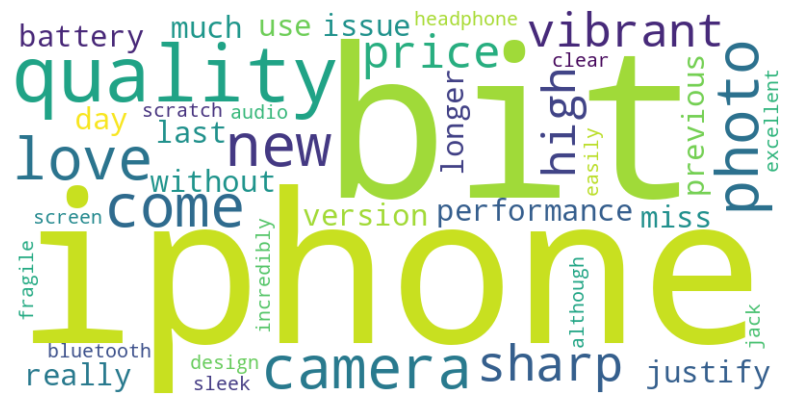

In [41]:
#Visualización:
sentences = [' '.join(w) for w in opinions['lemmatized_text'].to_list()] # unir todos los tokens de un mensaje en un solo string
stream = ' '.join(sentences) # juntar todos los textos en un solo stream
# Frecuencia de palabras:
viz_wordcloud(stream)

En el caso presentado no es necesario eliminar URLs, HTML o números.

# Siguientes pasos

Los datos preprocesados se convierten luego a un formato numérico utilizando algún método de representación de información textual.